# Airline Arrivals data Description

## Feature Description:

 01. Year: 2008
 02. Month: 1 - 4 (Jan - April)
 03. DayofMonth: 1 - 31
 04. DayOfWeek: 1 (Monday) - 7 (Sunday)
 05. DepTime actual departure time (local, hhm m) 
 06. CRSDepTime scheduled departure time (local, hhmm) 
 07. ArrTime actual arrival time (local, hhmm) 
 08. CRSArrTime scheduled arrival time (local, hhmm) 
 09. UniqueCarrier unique carrier code ASQP
 10. FlightNum flight number 
 11. TailNum plane tail number 
 12. ActualElapsedTime in minutes 
 13. CRSElapsedTime in minutes 
 14. AirTime in minutes 
 15. ArrDelay arrival delay, in minutes 
 16. DepDelay departure delay, in minutes 
 17. Origin origin IATA airport code 
 18. Dest destination IATA airport code 
 19. Distance in miles 
 20. TaxiIn taxi in time, in minutes 
 21. TaxiOut taxi out time in minutes 
 22. Cancelled was the flight cancelled? 1 = yes, 0 = no
 23. CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
 24. Diverted 1 = yes, 0 = no 
 25. CarrierDelay in minutes 
 26. WeatherDelay in minutes 
 27. NASDelay in minutes 
 28. SecurityDelay in minutes 
 29. LateAircraftDelay in minutes

1. Import data and libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/CBD_Robotic")
os.listdir()

['2008.csv', 'Untitled0.ipynb']

In [ ]:
# !bzip2 -d 2008.csv.bz2

In [4]:
import pandas as pd

data = pd.read_csv("2008.csv")
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [6]:
# User define variable and Setup
import warnings
warnings.filterwarnings("ignore")

# Set max column display is 100 row
pd.set_option('display.max_columns', 100)

2. Data expkoring and cleasing

In [ ]:
# Statistics descriptive
CategoryStatsDF = data.describe(exclude=[np.number])
NumericStatsDF = data.describe(include=[np.number])
display(CategoryStatsDF)
display(NumericStatsDF)

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
count,2389217,2346765,2389217,2389217,64442
unique,20,5031,291,293,4
top,WN,N693BR,ATL,ATL,A
freq,398966,1526,137014,136950,26075


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2389217.0,2.389217e+06,2.389217e+06,2.389217e+06,2.324775e+06,2.389217e+06,2.319121e+06,2.389217e+06,2.389217e+06,2.319121e+06,2.388810e+06,2.319121e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.389217e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000
mean,2008.0,2.505009e+00,1.566386e+01,3.909625e+00,1.340018e+03,1.329992e+03,1.485835e+03,1.496744e+03,2.213888e+03,1.286189e+02,1.293776e+02,1.051016e+02,1.027357e+01,1.143636e+01,7.261589e+02,6.839862e+00,1.668584e+01,2.697202e-02,2.366466e-03,15.752957,2.938243,16.158462,0.080459,20.976710
std,0.0,1.121493e+00,8.750405e+00,1.980431e+00,4.802717e+02,4.657833e+02,5.081295e+02,4.845238e+02,1.951392e+03,7.025303e+01,6.948246e+01,6.766801e+01,3.963429e+01,3.653229e+01,5.571763e+02,4.846435e+00,1.102905e+01,1.620017e-01,4.858875e-02,40.035487,19.166662,30.534167,1.742579,38.617154
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-9.100000e+01,-9.200000e+01,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.270000e+02,1.110000e+03,1.115000e+03,6.050000e+02,7.800000e+01,8.000000e+01,5.600000e+01,-9.000000e+00,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,3.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.325000e+03,1.516000e+03,1.520000e+03,1.544000e+03,1.110000e+02,1.110000e+02,8.700000e+01,0.000000e+00,0.000000e+00,5.830000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,4.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,3.631000e+03,1.600000e+02,1.600000e+02,1.340000e+02,1.500000e+01,1.100000e+01,9.570000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,4.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,9.050000e+02,1.435000e+03,8.860000e+02,2.461000e+03,2.467000e+03,4.962000e+03,2.130000e+02,3.830000e+02,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000


In [ ]:
# Check null data: data not null
data.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                64442
CRSDepTime                 0
ArrTime                70096
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                42452
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
ArrDelay               70096
DepDelay               64442
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 70096
TaxiOut                64442
Cancelled                  0
CancellationCode     2324775
Diverted                   0
CarrierDelay         1804634
WeatherDelay         1804634
NASDelay             1804634
SecurityDelay        1804634
LateAircraftDelay    1804634
dtype: int64

In [7]:
# fill some missing values by most frequent one
for col in ["CarrierDelay", "WeatherDelay", "NASDelay", 'SecurityDelay', 'LateAircraftDelay']:
    data[col] = data[col].fillna(0)

In [8]:
data.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                64442
CRSDepTime                 0
ArrTime                70096
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                42452
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
ArrDelay               70096
DepDelay               64442
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 70096
TaxiOut                64442
Cancelled                  0
CancellationCode     2324775
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [9]:
# Checking missing values
def find_missing_values(data):
    MissingDF = pd.DataFrame(columns= ["ColumnName", "Total_Missing_Values", "Percent_Missing"])
    for col in data.columns:
        NumOfMissing = data[col].isnull().sum() # Command check null data
        # NumOfMissing = (data[col]==0).sum() # Command check 0 values data as missing 
        if not NumOfMissing:
            continue
        PercentOfMissing = (NumOfMissing / data.shape[0])*100
        data_dict = {"ColumnName" : col, "Total_Missing_Values" : NumOfMissing, "Percent_Missing" : PercentOfMissing}
        MissingDF = MissingDF.append(data_dict, ignore_index=True)
    return MissingDF

In [10]:
MissingDF = find_missing_values(data)
MissingDF

,ColumnName,Total_Missing_Values,Percent_Missing
0,DepTime,64442,2.697202
1,ArrTime,70096,2.933848
2,TailNum,42452,1.776816
3,ActualElapsedTime,70096,2.933848
4,CRSElapsedTime,407,0.017035
5,AirTime,70096,2.933848
6,ArrDelay,70096,2.933848
7,DepDelay,64442,2.697202
8,TaxiIn,70096,2.933848
9,TaxiOut,64442,2.697202


In [11]:
# CancellationCode have 97% of missing => del feature
data = data.drop('CancellationCode', axis=1)
display(data.head())

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,55.0,16.0,18.0,HOU,LIT,393,4.0,9.0,0,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,71.0,2.0,5.0,HOU,MAF,441,3.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,71.0,-4.0,-6.0,HOU,MAF,441,2.0,14.0,0,0,0.0,0.0,0.0,0.0,0.0
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,108.0,-2.0,8.0,HOU,MCO,848,5.0,7.0,0,0,0.0,0.0,0.0,0.0,0.0
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,N462WN,123.0,130.0,107.0,16.0,23.0,HOU,MCO,848,6.0,10.0,0,0,16.0,0.0,0.0,0.0,0.0


In [12]:
# fill some missing values by most frequent one
for col in ["DepTime", "ArrTime", "TailNum", 'ActualElapsedTime', "CRSElapsedTime", 'AirTime', 'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut']:
    data[col] = data[col].fillna(data[col].mode().iloc[0])

In [13]:
# Check data types: Đinh dạng của các cột feature không tồn tại bất thường
data.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [14]:
# Check skew feature data
data.skew()

Year                   0.000000
Month                 -0.019312
DayofMonth             0.006298
DayOfWeek              0.076920
DepTime                0.064793
CRSDepTime             0.078910
ArrTime               -0.365476
CRSArrTime            -0.213479
FlightNum              0.903223
ActualElapsedTime      1.512575
CRSElapsedTime         1.504936
AirTime                1.570349
ArrDelay               5.351886
DepDelay               6.396139
Distance               1.627960
TaxiIn                 4.569612
TaxiOut                4.185447
Cancelled              5.839797
Diverted              20.483506
CarrierDelay          16.007818
WeatherDelay          27.881049
NASDelay               9.885667
SecurityDelay        103.131492
LateAircraftDelay      7.169980
dtype: float64

In [15]:
data.nunique()

Year                    1
Month                   4
DayofMonth             31
DayOfWeek               7
DepTime              1434
CRSDepTime           1158
ArrTime              1440
CRSArrTime           1331
UniqueCarrier          20
FlightNum            7269
TailNum              5031
ActualElapsedTime     668
CRSElapsedTime        476
AirTime               648
ArrDelay              935
DepDelay              921
Origin                291
Dest                  293
Distance             1377
TaxiIn                165
TaxiOut               277
Cancelled               2
Diverted                2
CarrierDelay          781
WeatherDelay          481
NASDelay              483
SecurityDelay         109
LateAircraftDelay     474
dtype: int64

3. Data visualization

In [ ]:
# Separate Numeric and categoric data column
Numeric_cols = data.select_dtypes(['float64', 'int64']).columns
Categoric_cols = data.select_dtypes(['object']).columns

In [ ]:
# Hàm dùng để vẽ pie chart và bar chart cho từng cột categoric
def Univariate_Cat(feature, data=data):
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    data[feature].value_counts().plot.pie(autopct='%1.1f%%')
    plt.subplot(1,2,2)
    sns.countplot(data[feature])
    data[feature].value_counts()
    plt.show()

# Hàm dùng để vẽ boxplot và histplot cho từng cột numeric
def Univariate_Num(feature, data=data):
    plt.figure(figsize = (18,8))
    f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data[feature], ax=ax_box)
    sns.histplot(data=data, x=feature, ax= ax_hist)
    plt.show()

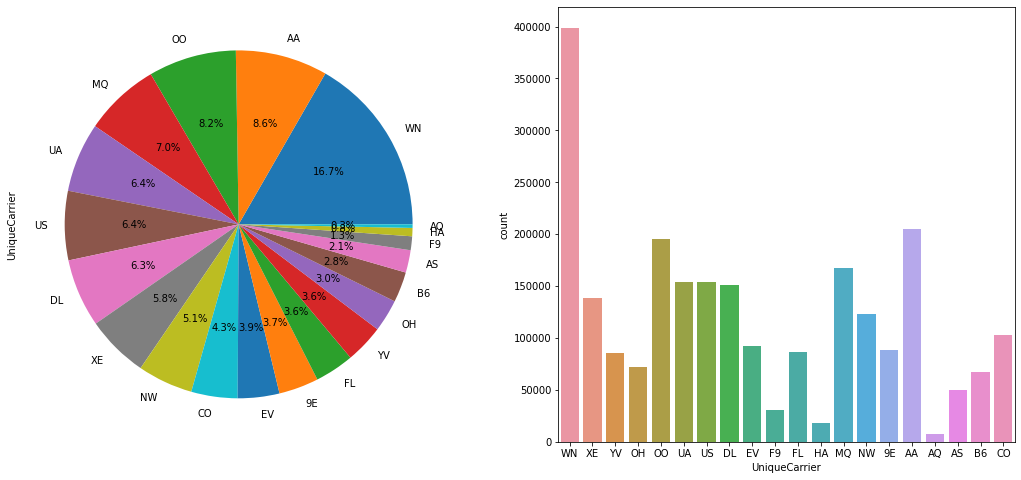

In [ ]:
Univariate_Cat('UniqueCarrier')

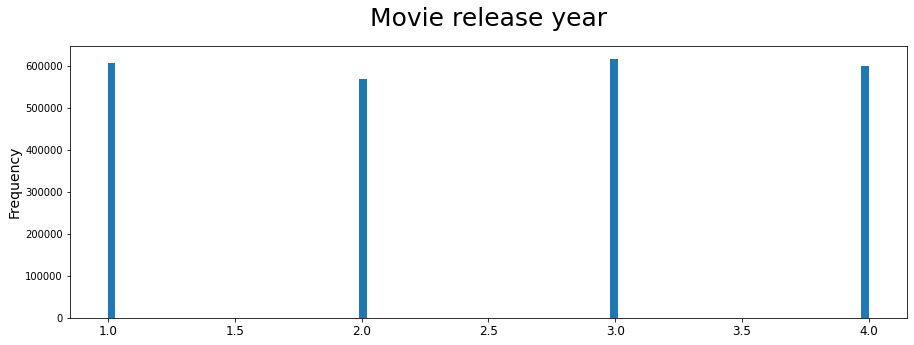

In [ ]:
plt.xticks(fontsize=12)
plt.ylabel("Nb. of occurences", fontsize=14)
plt.title("Movie release year", fontsize=25, pad=20)
data["Month"].plot.hist(figsize=(15,5), bins=100);

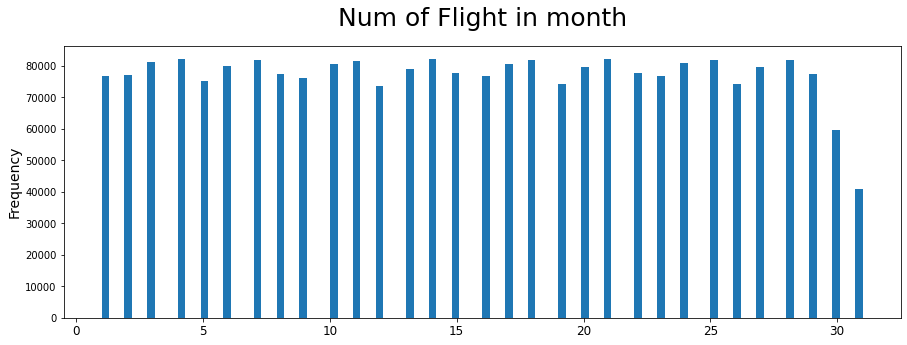

In [ ]:
plt.xticks(fontsize=12)
plt.ylabel("Nb. of occurences", fontsize=14)
plt.title("Num of Flight in month", fontsize=25, pad=20)
data["DayofMonth"].plot.hist(figsize=(15,5), bins=100);

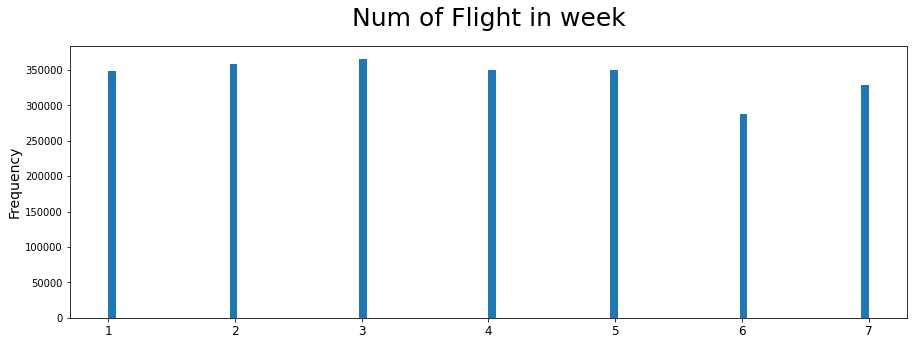

In [ ]:
plt.xticks(fontsize=12)
plt.ylabel("Nb. of occurences", fontsize=14)
plt.title("Num of Flight in week", fontsize=25, pad=20)
data["DayOfWeek"].plot.hist(figsize=(15,5), bins=100);

<Figure size 1296x576 with 0 Axes>

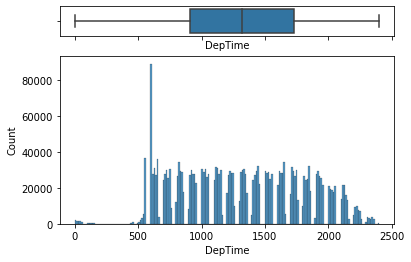

In [ ]:
Univariate_Num('DepTime')

<Figure size 1296x576 with 0 Axes>

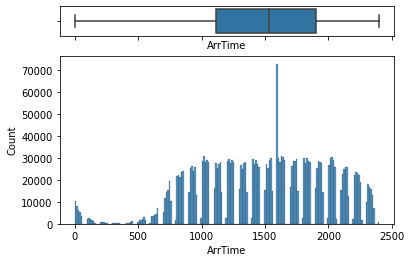

In [ ]:
Univariate_Num('ArrTime')

<Figure size 1296x576 with 0 Axes>

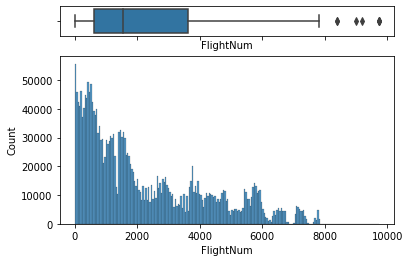

In [ ]:
Univariate_Num('FlightNum')

4. Data transformation

In [15]:
data["TotalDelay"] = data["ArrDelay"] + data["DepDelay"]
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,55.0,16.0,18.0,HOU,LIT,393,4.0,9.0,0,0,16.0,0.0,0.0,0.0,0.0,34.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,71.0,2.0,5.0,HOU,MAF,441,3.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0,7.0
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,71.0,-4.0,-6.0,HOU,MAF,441,2.0,14.0,0,0,0.0,0.0,0.0,0.0,0.0,-10.0
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,108.0,-2.0,8.0,HOU,MCO,848,5.0,7.0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,N462WN,123.0,130.0,107.0,16.0,23.0,HOU,MCO,848,6.0,10.0,0,0,16.0,0.0,0.0,0.0,0.0,39.0


In [16]:
# Adding delay condition is TotalDelay > 30 (minutes)
data['Delay'] = data['TotalDelay'].apply(lambda x: 1 if x >= 30 else 0)

In [17]:
data = data.drop(['TotalDelay', 'ArrDelay', 'DepDelay', 'Year'], axis=1)
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay
0,1,3,4,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,55.0,HOU,LIT,393,4.0,9.0,0,0,16.0,0.0,0.0,0.0,0.0,1
1,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,71.0,HOU,MAF,441,3.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0,0
2,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,71.0,HOU,MAF,441,2.0,14.0,0,0,0.0,0.0,0.0,0.0,0.0,0
3,1,3,4,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,108.0,HOU,MCO,848,5.0,7.0,0,0,0.0,0.0,0.0,0.0,0.0,0
4,1,3,4,1423.0,1400,1726.0,1710,WN,25,N462WN,123.0,130.0,107.0,HOU,MCO,848,6.0,10.0,0,0,16.0,0.0,0.0,0.0,0.0,1


In [18]:
X = data.drop('Delay', axis=1)
Y = data['Delay']

In [19]:
X_Num = X.drop(['UniqueCarrier', 'TailNum', 'Origin', 'Dest'], axis=1)
X_Num.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,1343.0,1325,1451.0,1435,588,68.0,70.0,55.0,393,4.0,9.0,0,0,16.0,0.0,0.0,0.0,0.0
1,1,3,4,1125.0,1120,1247.0,1245,1343,82.0,85.0,71.0,441,3.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0
2,1,3,4,2009.0,2015,2136.0,2140,3841,87.0,85.0,71.0,441,2.0,14.0,0,0,0.0,0.0,0.0,0.0,0.0
3,1,3,4,903.0,855,1203.0,1205,3,120.0,130.0,108.0,848,5.0,7.0,0,0,0.0,0.0,0.0,0.0,0.0
4,1,3,4,1423.0,1400,1726.0,1710,25,123.0,130.0,107.0,848,6.0,10.0,0,0,16.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.preprocessing import StandardScaler
def scaler_data(data, feature):
    X_Scaler = data.copy()
    sc = StandardScaler()

    sc.fit(data[feature].values.reshape(-1,1))
    sc.transform(data[feature].values.reshape(-1,1))
    X_Scaler[feature] = sc.transform(data[feature].values.reshape(-1,1))
    return X_Scaler

In [21]:
X_Cat = X[['UniqueCarrier', 'TailNum', 'Origin', 'Dest']]
X_Cat

,UniqueCarrier,TailNum,Origin,Dest
0,WN,N240WN,HOU,LIT
1,WN,N523SW,HOU,MAF
2,WN,N280WN,HOU,MAF
3,WN,N308SA,HOU,MCO
4,WN,N462WN,HOU,MCO
...,...,...,...,...
2389212,DL,N393DA,BOS,CVG
2389213,DL,N952DL,CVG,BOS
2389214,DL,N392DA,BOS,CVG
2389215,DL,N3756,CVG,BOS


In [22]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

X_Cat['UniqueCarrier_Enc'] = lb.fit_transform(X_Cat['UniqueCarrier'])
X_Cat['TailNum_Enc'] = lb.fit_transform(X_Cat['TailNum'])
X_Cat['Origin_ENC'] = lb.fit_transform(X_Cat['Origin'])
X_Cat['Dest_ENC'] = lb.fit_transform(X_Cat['Dest'])
X_Cat

,UniqueCarrier,TailNum,Origin,Dest,UniqueCarrier_Enc,TailNum_Enc,Origin_ENC,Dest_ENC
0,WN,N240WN,HOU,LIT,17,896,127,160
1,WN,N523SW,HOU,MAF,17,2435,127,166
2,WN,N280WN,HOU,MAF,17,1045,127,166
3,WN,N308SA,HOU,MCO,17,1159,127,170
4,WN,N462WN,HOU,MCO,17,2078,127,170
...,...,...,...,...,...,...,...,...
2389212,DL,N393DA,BOS,CVG,6,1673,35,71
2389213,DL,N952DL,CVG,BOS,6,4850,71,35
2389214,DL,N392DA,BOS,CVG,6,1669,35,71
2389215,DL,N3756,CVG,BOS,6,1576,71,35


In [23]:
X_Cat = X_Cat.drop(['UniqueCarrier', 'TailNum', 'Origin', 'Dest'], axis=1)
X_Cat.head()

,UniqueCarrier_Enc,TailNum_Enc,Origin_ENC,Dest_ENC
0,17,896,127,160
1,17,2435,127,166
2,17,1045,127,166
3,17,1159,127,170
4,17,2078,127,170


In [24]:
X_Final = pd.concat([X_Num, X_Cat], axis=1)
X_Final

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_Enc,TailNum_Enc,Origin_ENC,Dest_ENC
0,1,3,4,1343.0,1325,1451.0,1435,588,68.0,70.0,55.0,393,4.0,9.0,0,0,16.0,0.0,0.0,0.0,0.0,17,896,127,160
1,1,3,4,1125.0,1120,1247.0,1245,1343,82.0,85.0,71.0,441,3.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0,17,2435,127,166
2,1,3,4,2009.0,2015,2136.0,2140,3841,87.0,85.0,71.0,441,2.0,14.0,0,0,0.0,0.0,0.0,0.0,0.0,17,1045,127,166
3,1,3,4,903.0,855,1203.0,1205,3,120.0,130.0,108.0,848,5.0,7.0,0,0,0.0,0.0,0.0,0.0,0.0,17,1159,127,170
4,1,3,4,1423.0,1400,1726.0,1710,25,123.0,130.0,107.0,848,6.0,10.0,0,0,16.0,0.0,0.0,0.0,0.0,17,2078,127,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,4,17,4,1025.0,1025,1234.0,1237,1207,129.0,132.0,108.0,752,5.0,16.0,0,0,0.0,0.0,0.0,0.0,0.0,6,1673,35,71
2389213,4,17,4,1319.0,1320,1527.0,1524,1208,128.0,124.0,107.0,752,9.0,12.0,0,0,0.0,0.0,0.0,0.0,0.0,6,4850,71,35
2389214,4,17,4,1335.0,1335,1556.0,1553,1209,141.0,138.0,103.0,752,7.0,31.0,0,0,0.0,0.0,0.0,0.0,0.0,6,1669,35,71
2389215,4,17,4,1933.0,1935,2140.0,2141,1210,127.0,126.0,106.0,752,9.0,12.0,0,0,0.0,0.0,0.0,0.0,0.0,6,1576,71,35


In [26]:
# Normalize feature
X_Scaler = X_Final.copy()
for feature in X_Final.columns:
    X_Scaler = scaler_data(X_Scaler, feature)
X_Scaler

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_Enc,TailNum_Enc,Origin_ENC,Dest_ENC
0,-1.341970,-1.447231,0.045634,0.046946,-0.010718,-0.076218,-0.127432,-0.833194,-0.845883,-0.854464,-0.716813,-0.597942,-0.574424,-0.686496,-0.166492,-0.048704,0.580317,-0.075165,-0.237817,-0.022821,-0.242976,0.996882,-1.174458,-0.214468,0.197054
1,-1.341970,-1.447231,0.045634,-0.399151,-0.450837,-0.483411,-0.519570,-0.446291,-0.645321,-0.638575,-0.479548,-0.511793,-0.782809,-0.777962,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976,0.996882,-0.119051,-0.214468,0.274160
2,-1.341970,-1.447231,0.045634,1.409791,1.470658,1.291073,1.327605,0.833821,-0.573691,-0.638575,-0.479548,-0.511793,-0.991194,-0.229168,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976,0.996882,-1.072278,-0.214468,0.274160
3,-1.341970,-1.447231,0.045634,-0.853432,-1.019771,-0.571237,-0.602125,-1.132980,-0.100937,0.009092,0.069128,0.218676,-0.366038,-0.869427,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976,0.996882,-0.994099,-0.214468,0.325563
4,-1.341970,-1.447231,0.045634,0.210651,0.150301,0.472695,0.440135,-1.121706,-0.057959,0.009092,0.054299,0.218676,-0.157653,-0.595030,-0.166492,-0.048704,0.580317,-0.075165,-0.237817,-0.022821,-0.242976,0.996882,-0.363873,-0.214468,0.325563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,1.333037,0.152695,0.045634,-0.603782,-0.654795,-0.509360,-0.536081,-0.515985,0.027996,0.037877,0.069128,0.046379,-0.366038,-0.046237,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976,-0.869926,-0.641611,-1.406666,-0.946680
2389213,1.333037,0.152695,0.045634,-0.002166,-0.021453,0.075481,0.056253,-0.515472,0.013670,-0.077264,0.054299,0.046379,0.467503,-0.412099,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976,-0.869926,1.537094,-0.940154,-1.409315
2389214,1.333037,0.152695,0.045634,0.030575,0.010751,0.133367,0.116106,-0.514960,0.199906,0.124233,-0.005017,0.046379,0.050732,1.325746,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976,-0.869926,-0.644355,-1.406666,-0.946680
2389215,1.333037,0.152695,0.045634,1.254271,1.298904,1.299057,1.329669,-0.514447,-0.000656,-0.048478,0.039470,0.046379,0.467503,-0.412099,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976,-0.869926,-0.708132,-0.940154,-1.409315


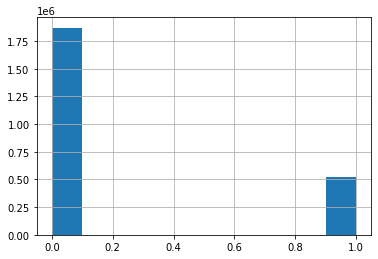

In [27]:
# Target feature đã cân bằng
Y.hist()

5. Apply model

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_Scaler, Y, test_size=0.2, random_state=42)

In [29]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1911373, 25)
X_test shape: (477844, 25)
Y_train shape: (1911373,)
Y_test shape: (477844,)


In [30]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, roc_auc_score

In [31]:
def gini_normalized(y_actual, y_pred):
    """Simple normalized Gini based on Scikit-Learn's roc_auc_score"""
    
    # If the predictions y_pred are binary class probabilities
    if y_pred.ndim == 2:
        if y_pred.shape[1] == 2:
            y_pred = y_pred[:, 1]
    gini = lambda a, p: 2 * roc_auc_score(a, p) - 1
    return gini(y_actual, y_pred) / gini(y_actual, y_actual)

5.1 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=log_reg,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.05, 1, 6),
    cv=5,
    scoring=make_scorer(gini_normalized, needs_proba=True)
)

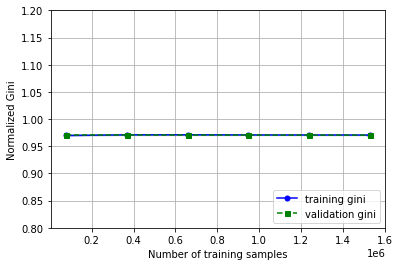

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
         label='training gini')
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation gini')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Normalized Gini')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.2])
plt.show()

5.2 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=nb,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.05, 1, 6),
    cv=5,
    scoring=make_scorer(gini_normalized, needs_proba=True)
)

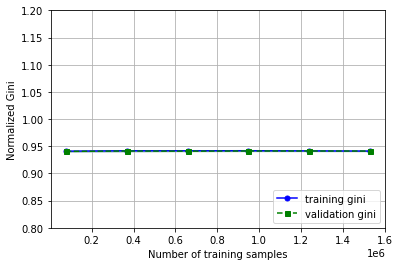

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
         label='training gini')
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation gini')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Normalized Gini')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.2])
plt.show()

5.3 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=dec_tree,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.05, 1, 6),
    cv=5,
    scoring=make_scorer(gini_normalized, needs_proba=True)
)

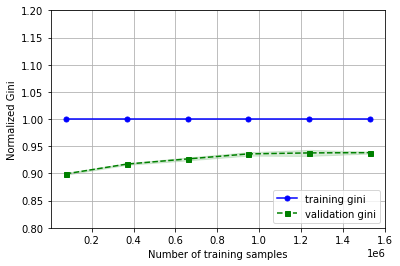

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
         label='training gini')
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation gini')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Normalized Gini')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.2])
plt.show()

5.4 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=ran_for,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.05, 1, 6),
    cv=5,
    scoring=make_scorer(gini_normalized, needs_proba=True)
)

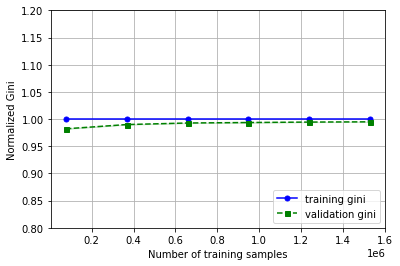

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
         label='training gini')
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation gini')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Normalized Gini')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.2])
plt.show()

5.5 XGB Classifier

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.05, 1, 6),
    cv=5,
    scoring=make_scorer(gini_normalized, needs_proba=True)
)

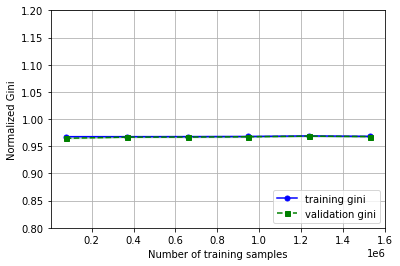

In [36]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
         label='training gini')
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation gini')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Normalized Gini')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.2])
plt.show()

5.6 Gradient Boosting Classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=gbc,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.05, 1, 6),
    cv=5,
    scoring=make_scorer(gini_normalized, needs_proba=True)
)

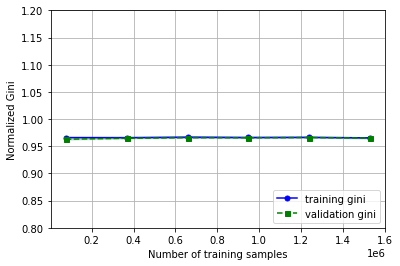

In [34]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
         label='training gini')
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation gini')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Normalized Gini')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.2])
plt.show()

6. PCA

In [25]:
# Normalize feature
X_Scaler = X_Num.copy()
for feature in X_Scaler.columns:
    X_Scaler = scaler_data(X_Scaler, feature)
X_Scaler

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,-1.341970,-1.447231,0.045634,0.046946,-0.010718,-0.076218,-0.127432,-0.833194,-0.845883,-0.854464,-0.716813,-0.597942,-0.574424,-0.686496,-0.166492,-0.048704,0.580317,-0.075165,-0.237817,-0.022821,-0.242976
1,-1.341970,-1.447231,0.045634,-0.399151,-0.450837,-0.483411,-0.519570,-0.446291,-0.645321,-0.638575,-0.479548,-0.511793,-0.782809,-0.777962,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976
2,-1.341970,-1.447231,0.045634,1.409791,1.470658,1.291073,1.327605,0.833821,-0.573691,-0.638575,-0.479548,-0.511793,-0.991194,-0.229168,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976
3,-1.341970,-1.447231,0.045634,-0.853432,-1.019771,-0.571237,-0.602125,-1.132980,-0.100937,0.009092,0.069128,0.218676,-0.366038,-0.869427,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976
4,-1.341970,-1.447231,0.045634,0.210651,0.150301,0.472695,0.440135,-1.121706,-0.057959,0.009092,0.054299,0.218676,-0.157653,-0.595030,-0.166492,-0.048704,0.580317,-0.075165,-0.237817,-0.022821,-0.242976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,1.333037,0.152695,0.045634,-0.603782,-0.654795,-0.509360,-0.536081,-0.515985,0.027996,0.037877,0.069128,0.046379,-0.366038,-0.046237,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976
2389213,1.333037,0.152695,0.045634,-0.002166,-0.021453,0.075481,0.056253,-0.515472,0.013670,-0.077264,0.054299,0.046379,0.467503,-0.412099,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976
2389214,1.333037,0.152695,0.045634,0.030575,0.010751,0.133367,0.116106,-0.514960,0.199906,0.124233,-0.005017,0.046379,0.050732,1.325746,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976
2389215,1.333037,0.152695,0.045634,1.254271,1.298904,1.299057,1.329669,-0.514447,-0.000656,-0.048478,0.039470,0.046379,0.467503,-0.412099,-0.166492,-0.048704,-0.184161,-0.075165,-0.237817,-0.022821,-0.242976


In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_Scaler)
PCA(n_components=5)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.19627018 0.15958857 0.07319394 0.0522177  0.04980203]
[3138.08430296 2829.68659448 1916.35073065 1618.62527796 1580.74183254]


In [27]:
X_pca = pca.transform(X_Scaler)
X_pca.shape

(2389217, 5)

In [28]:
x_pca_flat = X_pca.reshape(-1,5)
x_pca_flat

array([[-1.40623734,  0.04228744, -0.57527766,  0.1800059 ,  1.26622582],
       [-1.23635748, -0.83849872, -0.67853563, -0.0479474 ,  1.09629538],
       [-1.09156327,  2.81931093, -0.44455086, -0.53213694,  1.16479575],
       ...,
       [ 0.43121273,  0.09952695,  0.44442692,  0.21889783, -0.62508898],
       [ 0.33723567,  2.49421765, -0.65416073,  0.53245214, -0.5897032 ],
       [-1.08056708, -2.92888188,  0.21720628,  1.1485899 , -0.50526311]])

In [29]:
feat_cols = ['pca'+str(i) for i in range(x_pca_flat.shape[1])]

In [30]:
df_pca = pd.DataFrame(x_pca_flat,columns=feat_cols)
df_pca

,pca0,pca1,pca2,pca3,pca4
0,-1.406237,0.042287,-0.575278,0.180006,1.266226
1,-1.236357,-0.838499,-0.678536,-0.047947,1.096295
2,-1.091563,2.819311,-0.444551,-0.532137,1.164796
3,0.066286,-1.573412,-0.850761,0.010515,1.095611
4,0.321321,0.580530,-0.694742,0.064495,1.299198
...,...,...,...,...,...
2389212,0.050282,-1.190226,-0.410498,0.465054,-0.570116
2389213,0.111623,-0.011742,-0.470665,0.656974,-0.552297
2389214,0.431213,0.099527,0.444427,0.218898,-0.625089
2389215,0.337236,2.494218,-0.654161,0.532452,-0.589703


In [31]:
X_Final_02 = pd.concat([df_pca, X_Cat], axis=1)
X_Final_02

,pca0,pca1,pca2,pca3,pca4,UniqueCarrier_Enc,TailNum_Enc,Origin_ENC,Dest_ENC
0,-1.406237,0.042287,-0.575278,0.180006,1.266226,17,896,127,160
1,-1.236357,-0.838499,-0.678536,-0.047947,1.096295,17,2435,127,166
2,-1.091563,2.819311,-0.444551,-0.532137,1.164796,17,1045,127,166
3,0.066286,-1.573412,-0.850761,0.010515,1.095611,17,1159,127,170
4,0.321321,0.580530,-0.694742,0.064495,1.299198,17,2078,127,170
...,...,...,...,...,...,...,...,...,...
2389212,0.050282,-1.190226,-0.410498,0.465054,-0.570116,6,1673,35,71
2389213,0.111623,-0.011742,-0.470665,0.656974,-0.552297,6,4850,71,35
2389214,0.431213,0.099527,0.444427,0.218898,-0.625089,6,1669,35,71
2389215,0.337236,2.494218,-0.654161,0.532452,-0.589703,6,1576,71,35


In [32]:
from sklearn.preprocessing import MinMaxScaler
def scaler_MinMax_data(data, feature):
    X_Scaler = data.copy()
    sc = MinMaxScaler()

    sc.fit(data[feature].values.reshape(-1,1))
    sc.transform(data[feature].values.reshape(-1,1))
    X_Scaler[feature] = sc.transform(data[feature].values.reshape(-1,1))
    return X_Scaler

In [33]:
X_Scaler_pca = X_Final_02.copy()
for feature in X_Scaler_pca.columns:
    X_Scaler_pca = scaler_MinMax_data(X_Scaler_pca, feature)
X_Scaler_pca

,pca0,pca1,pca2,pca3,pca4,UniqueCarrier_Enc,TailNum_Enc,Origin_ENC,Dest_ENC
0,0.104934,0.453631,0.053680,0.409398,0.149234,0.894737,0.178131,0.437931,0.547945
1,0.113608,0.380547,0.051745,0.404194,0.145285,0.894737,0.484095,0.437931,0.568493
2,0.121000,0.684056,0.056129,0.393139,0.146877,0.894737,0.207753,0.437931,0.568493
3,0.180115,0.319567,0.048519,0.405528,0.145269,0.894737,0.230417,0.437931,0.582192
4,0.193136,0.498292,0.051442,0.406761,0.150000,0.894737,0.413121,0.437931,0.582192
...,...,...,...,...,...,...,...,...,...
2389212,0.179298,0.351362,0.056767,0.415906,0.106563,0.315789,0.332604,0.120690,0.243151
2389213,0.182430,0.449148,0.055640,0.420287,0.106977,0.315789,0.964215,0.244828,0.119863
2389214,0.198747,0.458380,0.072784,0.410286,0.105285,0.315789,0.331809,0.120690,0.243151
2389215,0.193948,0.657081,0.052202,0.417444,0.106107,0.315789,0.313320,0.244828,0.119863


7. Feature selection use SelectKBest

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=5).fit_transform(X_Scaler_pca, Y)
X_new.shape

(2389217, 5)

In [33]:
import sklearn
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5, step=1)
X_select = rfe.fit(X_Scaler_pca, Y)

In [34]:
X_Scaler_pca.head()

,pca0,pca1,pca2,pca3,pca4,UniqueCarrier_Enc,TailNum_Enc,Origin_ENC,Dest_ENC
0,0.104934,0.453653,0.053624,0.406219,0.151949,0.894737,0.178131,0.437931,0.547945
1,0.113607,0.380566,0.051682,0.401014,0.147911,0.894737,0.484095,0.437931,0.568493
2,0.121000,0.684093,0.056042,0.390108,0.149420,0.894737,0.207753,0.437931,0.568493
3,0.180114,0.319581,0.048486,0.402220,0.147841,0.894737,0.230417,0.437931,0.582192
4,0.193135,0.498315,0.051407,0.403510,0.152627,0.894737,0.413121,0.437931,0.582192


In [35]:
X_select.support_

array([ True,  True,  True,  True,  True, False, False, False, False])

In [36]:
X_select.ranking_

array([1, 1, 1, 1, 1, 5, 2, 4, 3])

In [34]:
X_chosen = X_Scaler_pca.iloc[:,:4]
X_chosen

,pca0,pca1,pca2,pca3
0,0.104934,0.453631,0.053680,0.409398
1,0.113608,0.380547,0.051745,0.404194
2,0.121000,0.684056,0.056129,0.393139
3,0.180115,0.319567,0.048519,0.405528
4,0.193136,0.498292,0.051442,0.406761
...,...,...,...,...
2389212,0.179298,0.351362,0.056767,0.415906
2389213,0.182430,0.449148,0.055640,0.420287
2389214,0.198747,0.458380,0.072784,0.410286
2389215,0.193948,0.657081,0.052202,0.417444


8. Grid Search CV 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_chosen, Y, test_size=0.2, random_state=42)

8.1 Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

In [37]:
# Random Forest
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 150, 200],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'max_depth': [None, 1,2],
    'criterion' :['gini']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=params, cv= 5)

In [39]:
CV_rfc.fit(X_train, Y_train)
print(CV_rfc.best_estimator_)
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

RandomForestClassifier(min_samples_leaf=3, random_state=42)
{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 100}
0.850884678348083


In [ ]:
rfc_turning = RandomForestClassifier(
    random_state=42, 
    criterion = 'gini', 
    max_depth = None, 
    max_features = 'auto', 
    min_samples_leaf = 3, 
    n_estimators = 100
    )

train_sizes, train_scores, test_scores = learning_curve(
    estimator=rfc_turning,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.05, 1, 6),
    cv=5,
    scoring=make_scorer(gini_normalized, needs_proba=True)
)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
         label='training gini')
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation gini')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Normalized Gini')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.2])
plt.show()

8.2 Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

In [ ]:
# GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [1, 10, 100],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'max_depth': [None, 1,2],
    'criterion' :['gini']
}
CV_gbc = GridSearchCV(estimator=gbc, param_grid=params, cv= 5)

In [ ]:
CV_gbc.fit(X_train, Y_train)
print(CV_gbc.best_estimator_)
print(CV_gbc.best_params_)
print(CV_gbc.best_score_)

In [ ]:
gbc_turning = GradientBoostingClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

train_sizes, train_scores, test_scores = learning_curve(
    estimator=gbc_turning,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.05, 1, 6),
    cv=5,
    scoring=make_scorer(gini_normalized, needs_proba=True)
)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
         label='training gini')
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation gini')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Normalized Gini')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.2])
plt.show()

  8.3 XGB Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
# GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [1, 10, 100],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'max_depth': [None, 1,2],
    'criterion' :['gini']
}
CV_xgb = GridSearchCV(estimator=xgb, param_grid=params, cv= 5)

In [ ]:
CV_xgb.fit(X_train, Y_train)
print(CV_xgb.best_estimator_)
print(CV_xgb.best_params_)
print(CV_xgb.best_score_)

In [ ]:
xgb_turning = XGBClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb_turning,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.05, 1, 6),
    cv=5,
    scoring=make_scorer(gini_normalized, needs_proba=True)
)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
         label='training gini')
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation gini')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Normalized Gini')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.2])
plt.show()